In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pratyushpuri/payment-card-fraud-detection-with-ml-models-2025")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/payment-card-fraud-detection-with-ml-models-2025


In [ ]:
import os

os.listdir(path)

['luxury_cosmetics_fraud_analysis_2025.json',
 'luxury_cosmetics_fraud_analysis_2025.csv',
 'luxury_cosmetics_fraud_analysis_2025.xlsx']

In [ ]:
path += "/luxury_cosmetics_fraud_analysis_2025.csv"

In [ ]:
import pandas as pd

df = pd.read_csv(path)
df.head()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Time,Customer_Age,Customer_Loyalty_Tier,Location,Store_ID,Product_SKU,Product_Category,Purchase_Amount,Payment_Method,Device_Type,IP_Address,Fraud_Flag,Footfall_Count
0,702bdd9b-9c93-41e3-9dbb-a849b2422080,119dca0b-8554-4b2d-9bec-e964eaf6af97,2025-07-27,04:04:15,56.0,Silver,San Francisco,FLAGSHIP-LA,NEBULA-SERUM-07,Concealer,158.24,Mobile Payment,Desktop,239.249.58.237,0,333
1,2e64c346-36bc-4acf-bc2b-8b0fdf46abc5,299df086-26c4-4708-b6d7-fcaeceb14637,2025-03-14,20:23:23,46.0,Platinum,Zurich,BOUTIQUE-SHANGHAI,STELLAR-FOUND-03,Lipstick,86.03,Credit Card,Tablet,84.49.227.90,0,406
2,29ad1278-70ce-421f-8d81-23816b39f4ac,dfa3d24d-b935-49a5-aa1d-7d57a44d8773,2025-02-20,12:36:02,32.0,Silver,Milan,POPUP-TOKYO,SOLAR-BLUSH-04,Mascara,255.69,Gift Card,Desktop,79.207.35.55,0,96
3,07dc4894-e0eb-48f1-99a7-1942b1973d9b,7a67e184-9369-49ee-aeac-18f5b51b230f,2025-04-25,19:09:43,60.0,Bronze,London,BOUTIQUE-NYC,GALAXIA-SET-08,Serum,282.76,Gift Card,Mobile,176.194.167.253,0,186
4,ae407054-5543-429c-918a-cdcc42ea9782,cf14730a-8f5a-453d-b527-39a278852b27,2025-04-17,14:23:23,NaN,Platinum,Miami,BOUTIQUE-NYC,LUNAR-MASC-02,Serum,205.86,Gift Card,Mobile,166.31.46.111,0,179


In [ ]:
df.describe()

,Customer_Age,Purchase_Amount,Fraud_Flag,Footfall_Count
count,2027.000000,2133.000000,2133.000000,2133.000000
mean,41.684262,174.614074,0.030942,272.461791
std,13.718110,72.249043,0.173202,131.113027
min,18.000000,50.260000,0.000000,50.000000
25%,30.000000,113.850000,0.000000,157.000000
50%,42.000000,174.180000,0.000000,269.000000
75%,53.000000,236.360000,0.000000,388.000000
max,65.000000,299.910000,1.000000,500.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Transaction_ID         2133 non-null   object 
 1   Customer_ID            2133 non-null   object 
 2   Transaction_Date       2133 non-null   object 
 3   Transaction_Time       2133 non-null   object 
 4   Customer_Age           2027 non-null   float64
 5   Customer_Loyalty_Tier  2027 non-null   object 
 6   Location               2133 non-null   object 
 7   Store_ID               2133 non-null   object 
 8   Product_SKU            2133 non-null   object 
 9   Product_Category       2133 non-null   object 
 10  Purchase_Amount        2133 non-null   float64
 11  Payment_Method         2027 non-null   object 
 12  Device_Type            2133 non-null   object 
 13  IP_Address             2133 non-null   object 
 14  Fraud_Flag             2133 non-null   int64  
 15  Foot

In [ ]:
df.isnull().sum()

,0
Transaction_ID,0
Customer_ID,0
Transaction_Date,0
Transaction_Time,0
Customer_Age,106
Customer_Loyalty_Tier,106
Location,0
Store_ID,0
Product_SKU,0
Product_Category,0


In [ ]:
from collections import Counter

target = Counter(df["Fraud_Flag"])

for k, v in target.items():
   percentage = v / len(df) * 100
   print(f'{k}: {v} ({percentage:.2f}%)')

0: 2067 (96.91%)
1: 66 (3.09%)


In [ ]:
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"], format="ISO8601")

df["DAY"] = df["Transaction_Date"].dt.day
df["MONTH"] = df["Transaction_Date"].dt.month
df["YEAR"] = df["Transaction_Date"].dt.year

In [ ]:
import pandas as pd
import numpy as np

# Asegúrate de que sea datetime
df["Transaction_Time"] = pd.to_datetime(df["Transaction_Time"], format="%H:%M:%S")

# Extraer hora decimal (hora + minutos/60 + segundos/3600)
df["Hour"] = (
    df["Transaction_Time"].dt.hour
    + df["Transaction_Time"].dt.minute / 60
    + df["Transaction_Time"].dt.second / 3600
)

# Codificación cíclica
df["Hour_sin"] = np.sin(2 * np.pi * df["Hour"] / 24)
df["Hour_cos"] = np.cos(2 * np.pi * df["Hour"] / 24)

print(df[["Transaction_Time", "Hour", "Hour_sin", "Hour_cos"]].head())

     Transaction_Time       Hour  Hour_sin  Hour_cos
0 1900-01-01 04:04:15   4.070833  0.875148  0.483855
1 1900-01-01 20:23:23  20.389722 -0.810596  0.585606
2 1900-01-01 12:36:02  12.600556 -0.156578 -0.987666
3 1900-01-01 19:09:43  19.161944 -0.954088  0.299527
4 1900-01-01 14:23:23  14.389722 -0.585606 -0.810596


In [ ]:
# Valores únicos de todas las columnas
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: Transaction_ID
['702bdd9b-9c93-41e3-9dbb-a849b2422080'
 '2e64c346-36bc-4acf-bc2b-8b0fdf46abc5'
 '29ad1278-70ce-421f-8d81-23816b39f4ac' ...
 '6f31818a-10c6-4c16-a616-e261dba03b45'
 '14eb417e-565c-40b3-8e2c-de9acc0db51a'
 '83108c8e-2ede-4e86-a0f6-ea4875c9e523']

Column: Customer_ID
['119dca0b-8554-4b2d-9bec-e964eaf6af97'
 '299df086-26c4-4708-b6d7-fcaeceb14637'
 'dfa3d24d-b935-49a5-aa1d-7d57a44d8773' ...
 '383d9c59-5ed6-43f0-94cf-2aca8db47b16'
 '5748a7a1-973b-4830-9cc0-6b27e1846002'
 'e94cecaf-9db8-49f4-97f6-a17bb5dd1187']

Column: Transaction_Date
<DatetimeArray>
['2025-07-27 00:00:00', '2025-03-14 00:00:00', '2025-02-20 00:00:00',
 '2025-04-25 00:00:00', '2025-04-17 00:00:00', '2025-04-12 00:00:00',
 '2025-03-21 00:00:00', '2025-03-12 00:00:00', '2025-08-06 00:00:00',
 '2025-07-03 00:00:00',
 ...
 '2025-03-23 00:00:00', '2025-06-14 00:00:00', '2025-04-20 00:00:00',
 '2025-03-30 00:00:00', '2025-07-21 00:00:00', '2025-05-31 00:00:00',
 '2025-05-06 00:00:00', '2025-08-10 00:00:00

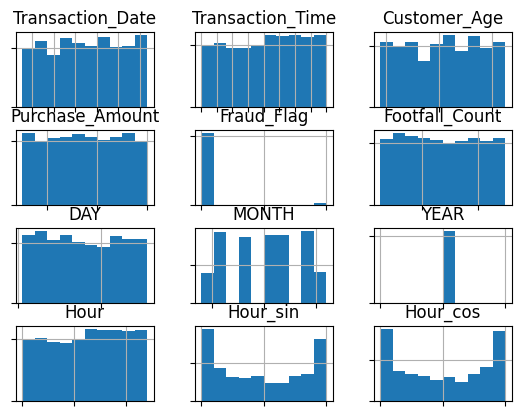

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean, std


ax = df.hist()

for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])


plt.show()

In [ ]:
df.drop("Transaction_Date", axis=1, inplace=True)
df.drop("Transaction_Time", axis=1, inplace=True)
df.drop("Transaction_ID", axis=1, inplace=True)
df.drop("Hour", axis=1, inplace=True)
df.drop("Customer_ID", axis=1, inplace=True)
df.drop("YEAR", axis=1, inplace=True)
df.drop("IP_Address", axis=1, inplace=True)

In [ ]:
def load_dataset(df):
    X = df.drop("Fraud_Flag", axis=1)
    y = df["Fraud_Flag"]
    return X, y

In [ ]:
X, y = load_dataset(df)

In [ ]:
X

,Customer_Age,Customer_Loyalty_Tier,Location,Store_ID,Product_SKU,Product_Category,Purchase_Amount,Payment_Method,Device_Type,Footfall_Count,DAY,MONTH,Hour_sin,Hour_cos
0,56.0,Silver,San Francisco,FLAGSHIP-LA,NEBULA-SERUM-07,Concealer,158.24,Mobile Payment,Desktop,333,27,7,0.875148,0.483855
1,46.0,Platinum,Zurich,BOUTIQUE-SHANGHAI,STELLAR-FOUND-03,Lipstick,86.03,Credit Card,Tablet,406,14,3,-0.810596,0.585606
2,32.0,Silver,Milan,POPUP-TOKYO,SOLAR-BLUSH-04,Mascara,255.69,Gift Card,Desktop,96,20,2,-0.156578,-0.987666
3,60.0,Bronze,London,BOUTIQUE-NYC,GALAXIA-SET-08,Serum,282.76,Gift Card,Mobile,186,25,4,-0.954088,0.299527
4,NaN,Platinum,Miami,BOUTIQUE-NYC,LUNAR-MASC-02,Serum,205.86,Gift Card,Mobile,179,17,4,-0.585606,-0.810596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,43.0,Silver,Monte Carlo,BOUTIQUE-NYC,NEBULA-SERUM-07,Eyeshadow Palette,274.97,Gift Card,Desktop,302,22,3,-0.352454,0.935829
2129,60.0,Silver,Monte Carlo,BOUTIQUE-DUBAI,SOLAR-BLUSH-04,Highlighter,121.29,Gift Card,Tablet,327,19,7,-0.410056,-0.912060
2130,27.0,Gold,Dubai,POPUP-MILAN,CELESTE-EYE-05,Serum,275.15,Credit Card,Desktop,192,6,8,0.363522,-0.931586
2131,NaN,Bronze,Tokyo,POPUP-TOKYO,AURORA-LIP-01,Serum,82.72,Mobile Payment,Mobile,293,6,6,0.951460,-0.307772


In [ ]:
# compare probabilistic models on the Haberman dataset
from numpy import mean, std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import brier_score_loss, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.gaussian_process import GaussianProcessClassifier

# calculate brier skill score (BSS)
def brier_skill_score(y_true, y_prob):
    # calculate reference brier score (baseline: proporción positiva ≈ 0.26471)
    ref_probs = [0.26471 for _ in range(len(y_true))]
    bs_ref = brier_score_loss(y_true, ref_probs)
    # calculate model brier score
    bs_model = brier_score_loss(y_true, y_prob)
    # calculate skill score
    return 1.0 - (bs_model / bs_ref)

# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation metric
    metric = make_scorer(brier_skill_score, response_method="predict_proba")
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores


def build_pipeline(X, model):

    num_cols = X.select_dtypes(include=["int64", "float64"]).columns
    cat_cols = X.select_dtypes(include=["object", "category"]).columns

    column_tr = ColumnTransformer(
        transformers=[
            ("num", Pipeline([
                ("imputer", SimpleImputer(strategy="mean")),
                ("scaler", StandardScaler())
            ]), num_cols),
            ("cat", Pipeline([
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
            ]), cat_cols)
        ]
    )

    pipeline = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', model)
    ])

    return pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def retrieve_models(X):

    num_cols = X.select_dtypes(include=["int64", "float64"]).columns
    cat_cols = X.select_dtypes(include=["object", "category"]).columns

    column_tr = ColumnTransformer(
        transformers=[
            ("num", Pipeline([
                ("imputer", SimpleImputer(strategy="mean")),
                ("scaler", StandardScaler())
            ]), num_cols),
            ("cat", Pipeline([
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
            ]), cat_cols)
        ]
    )

    models = dict()
    models['SVC'] = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', SVC(random_state=42, probability=True))
    ])
    models['LR'] = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', LogisticRegression(max_iter=1000, random_state=42, solver="lbfgs"))
    ])
    models['LDA'] = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', LinearDiscriminantAnalysis())
    ])
    models['RF'] = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', RandomForestClassifier(random_state=42, n_estimators=1000))
    ])
    models['GB'] = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', GradientBoostingClassifier(random_state=42))
    ])
    models['NB'] = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', GaussianNB())
    ])

    return models

In [ ]:
models = retrieve_models(X)

SVC: 0.645721682878123 0.020834032855414807
LR: 0.6341161173653579 0.022036455152420246
LDA: 0.6239038361006208 0.024507832632811165
RF: 0.6380072991946495 0.020249447254065512
GB: 0.5985157740546729 0.04237901866811951
NB: -7.493798878576386 0.7581181433763072


/tmp/ipython-input-2750091807.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=models.keys(), showmeans=True)


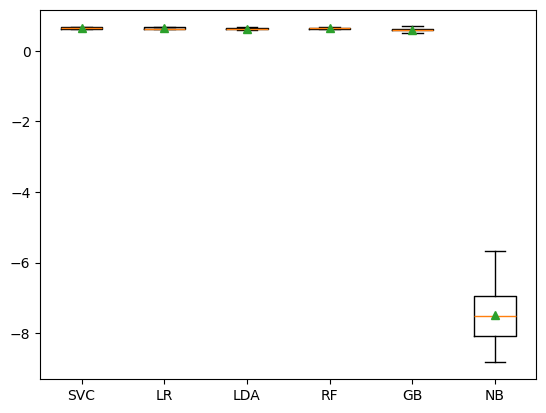

In [ ]:
results = list()

for key, value in models.items():
    scores = evaluate_model(X, y, value)
    results.append(scores)
    print(f"{key}: {mean(scores)} {std(scores)}")

pyplot.boxplot(results, labels=models.keys(), showmeans=True)
pyplot.show()

In [ ]:
from imblearn.under_sampling import (
    TomekLinks,
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
    OneSidedSelection,
    NeighbourhoodCleaningRule
)
from imblearn.over_sampling import (
    RandomOverSampler,
    SMOTE,
    BorderlineSMOTE,
    ADASYN
)

def retrieve_undersampling_oversampling_techniques():
    techniques = {
        # =======================
        # UNDERSAMPLING
        # =======================
        "TomekLinks": TomekLinks(),
        "ENN": EditedNearestNeighbours(),
        "RENN": RepeatedEditedNearestNeighbours(),
        "OSS": OneSidedSelection(),
        "NCR": NeighbourhoodCleaningRule(),

        # =======================
        # OVERSAMPLING
        # =======================
        "RandomOverSampler": RandomOverSampler(),
        "SMOTE": SMOTE(),
        "BorderlineSMOTE": BorderlineSMOTE(),
        "ADASYN": ADASYN(),
    }

    return techniques

In [ ]:
techniques = retrieve_undersampling_oversampling_techniques()

>TomekLinks 0.598 (0.040)
>ENN 0.588 (0.039)
>RENN 0.590 (0.037)
>OSS 0.603 (0.041)
>NCR 0.586 (0.049)
>RandomOverSampler -0.171 (0.125)
>SMOTE 0.585 (0.028)
>BorderlineSMOTE 0.587 (0.050)
>ADASYN 0.584 (0.027)


/tmp/ipython-input-1678356877.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=techniques.keys(), showmeans=True)


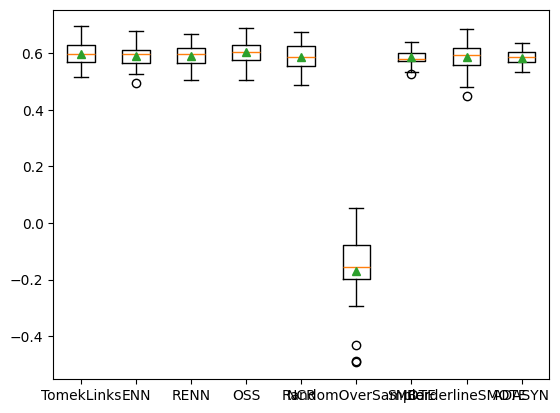

In [ ]:
results = []

for key, value in techniques.items():
    num_cols = X.select_dtypes(include=["int64", "float64"]).columns
    cat_cols = X.select_dtypes(include=["object", "category"]).columns

    column_tr = ColumnTransformer(
        transformers=[
            ("num", Pipeline([
                ("imputer", SimpleImputer(strategy="mean")),
                ("scaler", StandardScaler())
            ]), num_cols),
            ("cat", Pipeline([
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
            ]), cat_cols)
        ]
    )
    pipeline = ImbPipeline([
        ('prep', column_tr),
        ('technique', value),
        ('model', GradientBoostingClassifier(random_state=42))
    ])
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    print('>%s %.3f (%.3f)' % (key, mean(scores), std(scores)))

pyplot.boxplot(results, labels=techniques.keys(), showmeans=True)
pyplot.show()

In [341]:
from sklearn.calibration import CalibratedClassifierCV


def build_final_pipeline(X):

    num_cols = X.select_dtypes(include=["int64", "float64"]).columns
    cat_cols = X.select_dtypes(include=["object", "category"]).columns

    column_tr = ColumnTransformer(
        transformers=[
            ("num", Pipeline([
                ("imputer", SimpleImputer(strategy="mean")),
                ("scaler", StandardScaler())
            ]), num_cols),
            ("cat", Pipeline([
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
            ]), cat_cols)
        ]
    )

    calibrated_model = CalibratedClassifierCV(estimator=SVC(random_state=42, gamma='scale', class_weight={0: 1, 1: 99}), method="isotonic", cv=3)

    pipeline = ImbPipeline([
        ('prep', column_tr),
        ('technique', techniques['OSS']),
        ('model', calibrated_model)
    ])

    return pipeline

In [340]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,
    random_state=42,
    stratify=y
)

In [347]:
pipe = build_final_pipeline(X_train)
pipe.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Customer_Age', 'Purchase_Amount', 'Footfall_Count', 'Hour_sin',
       'Hour_cos'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Customer_Loyalty_Tier', 'Location', 'Store_ID', 'Product_SKU',
       'Product_Category', 'Payment_Method', 'Device_Type'],
      dtype='object'))])),
                ('technique', OneSidedSelection()),
                ('model',
                 CalibratedClassifierCV(cv=3,
                                        estimator=SVC(class_weight={0: 1,
                                                                    1: 99},
                                                      random_state=42),
                                        method='isotonic'))])

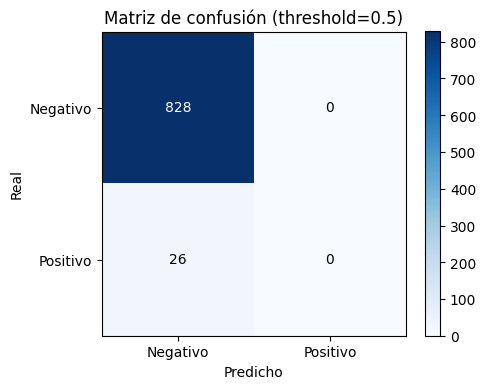

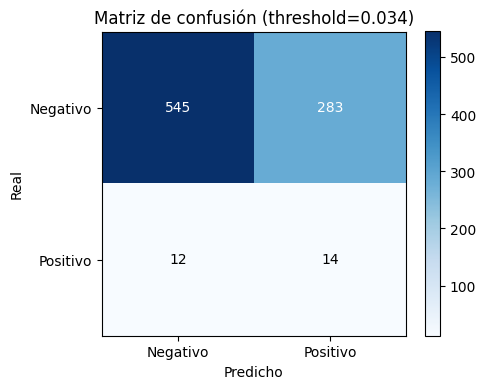

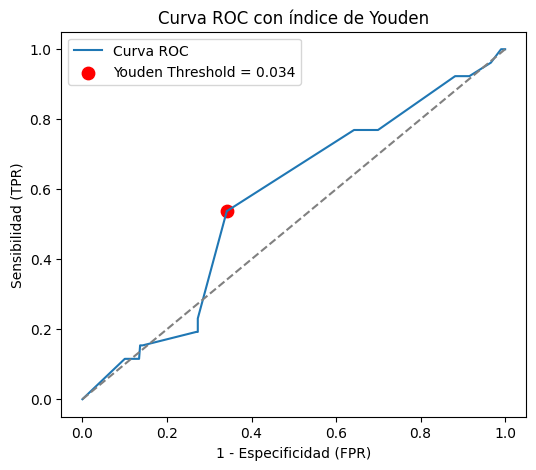

In [358]:
from sklearn.metrics import confusion_matrix, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# --- Función para graficar matriz de confusión bonita ---
def plot_confusion_matrix(cm, title="Matriz de confusión", cmap=plt.cm.Blues):
    plt.figure(figsize=(5,4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    classes = ["Negativo", "Positivo"]
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    # Anotar valores en cada celda
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Real')
    plt.xlabel('Predicho')
    plt.tight_layout()
    plt.show()

# --- Entrenar y predecir ---
pipe = build_final_pipeline(X_train)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

# --- Matriz con threshold = 0.5 ---
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, title="Matriz de confusión (threshold=0.5)")

# --- Threshold óptimo (Youden) ---
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
youden_index = tpr - fpr
best_threshold = thresholds[np.argmax(youden_index)]

y_pred_opt = (y_proba >= best_threshold).astype(int)
cm_opt = confusion_matrix(y_test, y_pred_opt)
plot_confusion_matrix(cm_opt, title=f"Matriz de confusión (threshold={best_threshold:.3f})")

# --- Curva ROC con punto óptimo ---
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="Curva ROC")
plt.scatter(fpr[np.argmax(youden_index)], tpr[np.argmax(youden_index)],
            color="red", s=80, label=f"Youden Threshold = {best_threshold:.3f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("1 - Especificidad (FPR)")
plt.ylabel("Sensibilidad (TPR)")
plt.title("Curva ROC con índice de Youden")
plt.legend()
plt.show()